# Comparing Ratings from Multiple Methods
Prepared by: Nickolas K. Freeman, Ph.D.

In previous notebooks, we have looked at various techniques for ranking a set of $m$ alternatives with respect to $n$ criteria. In particular, we have looked at the weighted sum method, the weighted product method, and the TOPSIS method. When looking at the various techniques, we noted that each method may produce different results. Thus, it is worthwhile to consider how we may use the rankings from many different methods to group the alternatives based on similarity. This issue will be the topic of this notebook. The following cell imports modules that we will be using, specifies some plotting parameters, reads the data we will be using into a `pandas` dataframe, and prints the `head` of the dataframe.

**Note that the `mcdm_functions` modules requires the file '*mcdm_functions.py*' to be saved in the directory from which this notebook is running.**

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import mcdm_functions as mcfunc

plt.rcParams.update({'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

supplier_data = pd.read_csv('Supplier_Data.csv')
supplier_data.head()

,Supplier,Warranty Terms,Payment Terms,Technical Support,Sustainability Efforts,Financial Stability,Unit Cost,Lead Time (Days),On Time Delivery
0,1,2.42,2.80,8.25,3.09,8.21,1.05,8,0.75
1,2,6.51,1.88,3.60,6.45,4.31,1.21,13,0.83
2,3,8.51,1.06,2.97,9.36,5.06,1.22,12,0.91
3,4,4.63,4.60,5.84,7.34,9.20,1.01,9,0.72
4,5,4.62,7.44,1.50,8.93,4.01,1.03,7,0.97


The following code block uses the `Convert_Higher_is_Better` function to transform scores in `Unit Cost` and `Lead Time (Days)` columns into a *higher is better* format using a *relative* normalization. 

In [2]:
supplier_data =  mcfunc.Convert_Higher_is_Better(supplier_data,['Unit Cost','Lead Time (Days)'],'relative')
supplier_data.head()

,Supplier,Warranty Terms,Payment Terms,Technical Support,Sustainability Efforts,Financial Stability,Unit Cost,Lead Time (Days),On Time Delivery,Unit Cost (relative HIB),Lead Time (Days) (relative HIB)
0,1,2.42,2.80,8.25,3.09,8.21,1.05,8,0.75,0.862069,0.538462
1,2,6.51,1.88,3.60,6.45,4.31,1.21,13,0.83,0.310345,0.153846
2,3,8.51,1.06,2.97,9.36,5.06,1.22,12,0.91,0.275862,0.230769
3,4,4.63,4.60,5.84,7.34,9.20,1.01,9,0.72,1.000000,0.461538
4,5,4.62,7.44,1.50,8.93,4.01,1.03,7,0.97,0.931034,0.615385


The following code block normalizes the scores in each column by dividing each score by the maximum score in the same column. **Note that this normalization does not affect the scores in the `Unit Cost (relative HIB)` and `Lead Time (Days) (relative HIB)` columns because the normalization we used to obtain a *higher is better* score essentially performs the same normalization.**

In [3]:
column_list = ['Warranty Terms',
               'Payment Terms',
               'Technical Support',
               'Sustainability Efforts',
               'Financial Stability',
               'Unit Cost (relative HIB)',
               'Lead Time (Days) (relative HIB)']

supplier_data = mcfunc.Normalize_Column_Scores(supplier_data, column_list, 'divide_by_max')
supplier_data.head()

,Supplier,Warranty Terms,Payment Terms,Technical Support,Sustainability Efforts,Financial Stability,Unit Cost,Lead Time (Days),On Time Delivery,Unit Cost (relative HIB),Lead Time (Days) (relative HIB)
0,1,0.242728,0.280843,0.834176,0.313070,0.836901,1.05,8,0.75,0.862069,0.538462
1,2,0.652959,0.188566,0.364004,0.653495,0.439348,1.21,13,0.83,0.310345,0.153846
2,3,0.853561,0.106319,0.300303,0.948328,0.515800,1.22,12,0.91,0.275862,0.230769
3,4,0.464393,0.461384,0.590495,0.743668,0.937819,1.01,9,0.72,1.000000,0.461538
4,5,0.463390,0.746239,0.151668,0.904762,0.408767,1.03,7,0.97,0.931034,0.615385


The following code block uses the `Robust_Ranking` function to identify the suppliers identified as ranking in the top 15 based on the weighted sum scoring method. 

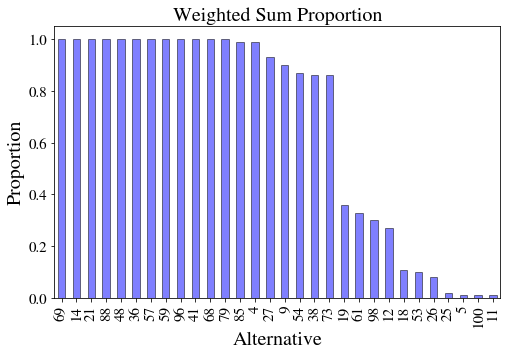

In [4]:
criteria_list = ['Warranty Terms',
                 'Payment Terms',
                 'Technical Support',
                 'Sustainability Efforts',
                 'Financial Stability',
                 'Unit Cost (relative HIB)',
                 'Lead Time (Days) (relative HIB)']

criteria_weights = np.array([1,1,1,1,1,1,1])

WS_Results = mcfunc.Robust_Ranking(supplier_data,
                                   criteria_list,
                                   100,
                                   criteria_weights,
                                   'Supplier',
                                   perturbation_range=0.25,
                                   score_type='weighted_sum',
                                   top_values=20,
                                   include_plot=True)

The following list uses the `Robust_Ranking` function to identify the suppliers identified as ranking in the top 15 based on the weighted product scoring method. 

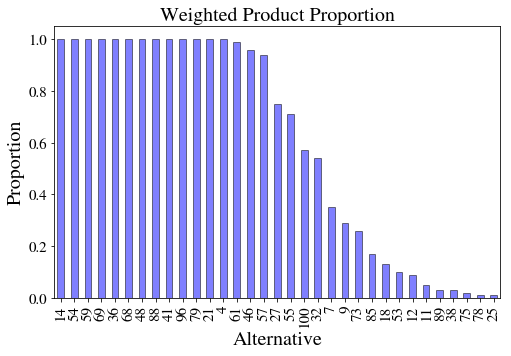

In [5]:
WP_Results = mcfunc.Robust_Ranking(supplier_data,
                                   criteria_list,
                                   100,
                                   criteria_weights,
                                   'Supplier',
                                   perturbation_range=0.25,
                                   score_type='weighted_product',
                                   top_values=20,
                                   include_plot=True)

The following list uses the `Robust_Ranking` function to identify the suppliers identified as ranking in the top 15 based on the TOPSIS scoring method. 

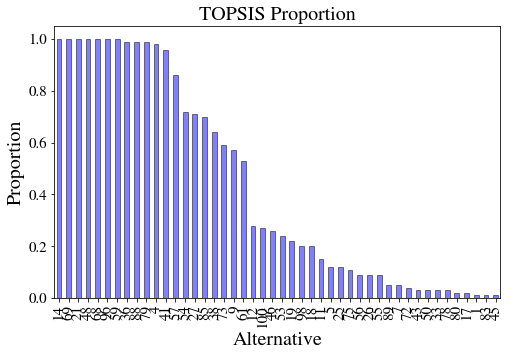

In [6]:
TOPSIS_Results = mcfunc.Robust_Ranking(supplier_data,
                                       criteria_list,
                                       100,
                                       criteria_weights,
                                       'Supplier',
                                       perturbation_range=0.25,
                                       score_type='topsis',
                                       top_values=20,
                                       include_plot=True)

The following code block uses `pandas` `merge` function and the `reduce` module  from the `functools` module to join the dataframes containing the scores for the three methods. From the documentation for the `reduce` function:
> [The `reduce` function applies] a function of two arguments cumulatively to the items of a sequence, from left to right, so as to reduce the sequence to a single value. For example, reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) calculates
((((1+2)+3)+4)+5).

The function we are applying merges two dataframes, i.e., a *left* and a *right*  dataframe. Specifying an *outer* join makes sure the merged dataframe includes all records from both of the joined dataframes. Other join types may be specified if dropping any missing values is desired.

After merging the dataframes, we fill all missing values with zeros, drop columns corresponding to counts, and print the resulting dataframe.

In [7]:
combination_list = [WS_Results, 
                    WP_Results, 
                    TOPSIS_Results]

from functools import reduce

Combined_Results = reduce(lambda left,right: pd.merge(left, right, on='Supplier', how='outer'), combination_list)

Combined_Results.fillna(0, inplace=True)
columns_to_drop = ['Weighted Sum Count','Weighted Product Count','TOPSIS Count']
Combined_Results.drop(columns_to_drop,axis=1,inplace=True)

Combined_Results

,Supplier,Weighted Sum Proportion,Weighted Product Proportion,TOPSIS Proportion
0,69,1.00,1.00,1.00
1,14,1.00,1.00,1.00
2,21,1.00,1.00,1.00
3,88,1.00,1.00,0.99
4,48,1.00,1.00,1.00
5,36,1.00,1.00,0.99
6,57,1.00,0.94,0.86
7,59,1.00,1.00,1.00
8,96,1.00,1.00,1.00
9,41,1.00,1.00,0.96


The following code block creates an `Average Ranking` column that captures the average proportion of instances that each supplier appears as a top supplier in any of the three scoring methods. This averaging is essentially an *ensemble score* that comines scores from several different methods into a single score.

Once the ensemble score is calculated, we use it to sort the dataframe.

In [8]:
Combined_Results['Average Ranking'] = (Combined_Results['Weighted Sum Proportion']+\
                                      Combined_Results['Weighted Product Proportion']+\
                                      Combined_Results['TOPSIS Proportion'])/3
Combined_Results.sort_values('Average Ranking',inplace=True, ascending=False)
Combined_Results

,Supplier,Weighted Sum Proportion,Weighted Product Proportion,TOPSIS Proportion,Average Ranking
0,69,1.00,1.00,1.00,1.000000
10,68,1.00,1.00,1.00,1.000000
2,21,1.00,1.00,1.00,1.000000
4,48,1.00,1.00,1.00,1.000000
1,14,1.00,1.00,1.00,1.000000
7,59,1.00,1.00,1.00,1.000000
8,96,1.00,1.00,1.00,1.000000
3,88,1.00,1.00,0.99,0.996667
5,36,1.00,1.00,0.99,0.996667
11,79,1.00,1.00,0.99,0.996667


Aside from computing an ensemble score, we may also use cluster analysis to group the alternatives based on the scores from the various methods. From https://en.wikipedia.org/wiki/Cluster_analysis (accessed 3/8/2018):

> Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including machine learning, pattern recognition, image analysis, information retrieval, bioinformatics, data compression, and computer graphics.

> Cluster analysis itself is not one specific algorithm, but the general task to be solved. It can be achieved by various algorithms that differ significantly in their notion of what constitutes a cluster and how to efficiently find them. Popular notions of clusters include groups with small distances between cluster members, dense areas of the data space, intervals or particular statistical distributions. Clustering can therefore be formulated as a multi-objective optimization problem. The appropriate clustering algorithm and parameter settings (including parameters such as the distance function to use, a density threshold or the number of expected clusters) depend on the individual data set and intended use of the results. Cluster analysis as such is not an automatic task, but an iterative process of knowledge discovery or interactive multi-objective optimization that involves trial and failure. It is often necessary to modify data preprocessing and model parameters until the result achieves the desired properties.

Although many approaches exist for performing a cluster analysis, we will only consider two of the more popular methods. To visualize the results we obtain by applying each method, we will use 3-D scatterplots. Uncommenting the code in the following block allows us to generate interactive plots within the Jupyter notebook.

In [9]:
# %matplotlib notebook

The following code block generates a 3-D scatterplot, where the axes provide the proportion of instances each supplier is identified as a top supplier using the scoring methods we considered. 

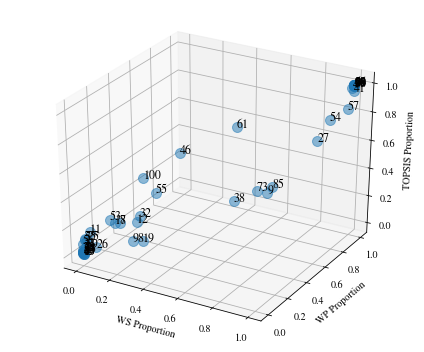

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter(Combined_Results['Weighted Sum Proportion'],
           Combined_Results['Weighted Product Proportion'],
           Combined_Results['TOPSIS Proportion'],
           s=100,
           depthshade=False,
           alpha=0.50)
ax.set_xlabel('WS Proportion')
ax.set_ylabel('WP Proportion')
ax.set_zlabel('TOPSIS Proportion')

for i in range(len(Combined_Results['Supplier'])): 
    ax.text(Combined_Results['Weighted Sum Proportion'].iloc[i],
            Combined_Results['Weighted Product Proportion'].iloc[i],
            Combined_Results['TOPSIS Proportion'].iloc[i],
            '{}'.format(Combined_Results['Supplier'].iloc[i]), size=12, zorder=1,  
    color='k') 

plt.tight_layout()
plt.show()

The following code block stores proportion values from the `Combined_Results` dataframe as an array of values.

In [11]:
my_values = Combined_Results[['Weighted Sum Proportion',
                              'Weighted Product Proportion',
                              'TOPSIS Proportion']].values

The first clustering approach we will look at is *k-means* clustering. From https://en.wikipedia.org/wiki/K-means_clustering (accessed 3/8/2018):

> k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. 

We will use the k-means implementation from the `scikit-learn` module. The following code block imports the appropriate sub-module, defines a k-means model with 4 clusters, and uses the proportion data to identify clusters for the supplier data. The cluster assignments are printed.

In [12]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=4)
k_means.fit(my_values) 
print(k_means.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 2 2 3 3 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


The  following code block shows how to identify the coordinates for the cluster centers. 

In [13]:
k_means.cluster_centers_

array([[ 0.05478261,  0.03434783,  0.09347826],
       [ 0.986     ,  0.97933333,  0.94666667],
       [ 0.9025    ,  0.1875    ,  0.625     ],
       [ 0.068     ,  0.754     ,  0.23      ]])

The following code block prints the *inertia* for the clustering. The inertia captures the within-cluster sum-of-squares, which is the criteria that the clustering algorithm attempts to minimize when identifying cluster centers.

In [14]:
k_means.inertia_

1.254497536231884

The following code block stores the cluster fits as a new column in the `Combined_Results` dataframe and uses these fits to color the points in our scatterplot.

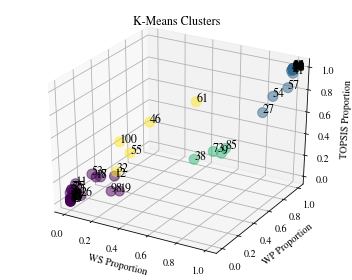

In [15]:
Combined_Results['K-Means Cluster'] = k_means.labels_ + 1

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter(Combined_Results['Weighted Sum Proportion'],
           Combined_Results['Weighted Product Proportion'],
           Combined_Results['TOPSIS Proportion'],
           s=100,
           c =Combined_Results['K-Means Cluster'],
           depthshade=False,
           alpha=0.50)
ax.set_xlabel('WS Proportion')
ax.set_ylabel('WP Proportion')
ax.set_zlabel('TOPSIS Proportion')
ax.set_title('K-Means Clusters')

for i in range(len(Combined_Results['Supplier'])): 
    ax.text(Combined_Results['Weighted Sum Proportion'].iloc[i],
            Combined_Results['Weighted Product Proportion'].iloc[i],
            Combined_Results['TOPSIS Proportion'].iloc[i],
            '{}'.format(Combined_Results['Supplier'].iloc[i]), size=12, zorder=1,  
    color='k') 
    
plt.tight_layout()
plt.show()

The second clustering approach we will look at is a *Gaussian Mixture Model* (GMM). From https://en.wikipedia.org/wiki/Mixture_model#Gaussian_mixture_model (accessed 3/8/2018):

> In statistics, a mixture model is a probabilistic model for representing the presence of subpopulations within an overall population, without requiring that an observed data set should identify the sub-population to which an individual observation belongs. Formally a mixture model corresponds to the mixture distribution that represents the probability distribution of observations in the overall population. However, while problems associated with "mixture distributions" relate to deriving the properties of the overall population from those of the sub-populations, "mixture models" are used to make statistical inferences about the properties of the sub-populations given only observations on the pooled population, without sub-population identity information.

The following code block fits a GMM, which is also available in scikit-learn, that assumes four components (sub-populations) exist. The fits are stored in a new column of the `Combined_Results` dataframe and use to  color the scatterplot.

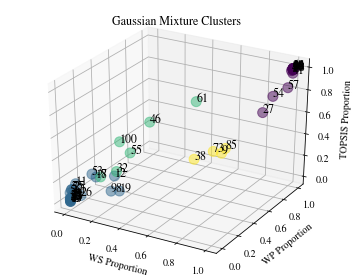

In [16]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(my_values)
Combined_Results['GM Cluster']  = gmm.predict(my_values) + 1


fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter(Combined_Results['Weighted Sum Proportion'],
           Combined_Results['Weighted Product Proportion'],
           Combined_Results['TOPSIS Proportion'],
           s=100,
           c=Combined_Results['GM Cluster'],
           depthshade=False,
           alpha=0.50
          )
ax.set_xlabel('WS Proportion')
ax.set_ylabel('WP Proportion')
ax.set_zlabel('TOPSIS Proportion')
ax.set_title('Gaussian Mixture Clusters')

for i in range(len(Combined_Results['Supplier'])): 
    ax.text(Combined_Results['Weighted Sum Proportion'].iloc[i],
            Combined_Results['Weighted Product Proportion'].iloc[i],
            Combined_Results['TOPSIS Proportion'].iloc[i],
            '{}'.format(Combined_Results['Supplier'].iloc[i]), size=12, zorder=1,  
    color='k') 

plt.tight_layout()
plt.show()

The following code block allows us to set a common number of clusters/components and compare the clusters determined by the k-means and GMM models.

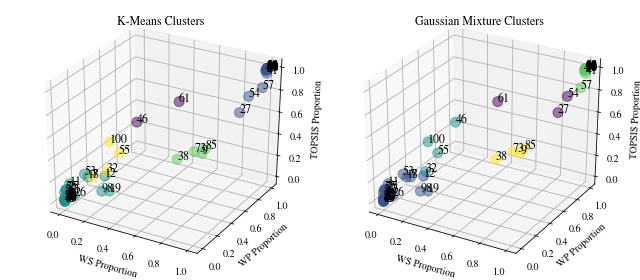

In [17]:
Clusters = 5

gmm = GaussianMixture(n_components=Clusters)
gmm.fit(my_values)
Combined_Results['GM Cluster']  = gmm.predict(my_values) + 1


k_means = cluster.KMeans(n_clusters=Clusters)
k_means.fit(my_values) 
Combined_Results['K-Means Cluster'] = k_means.labels_ + 1


fig = plt.figure(figsize=(9,4))

ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.scatter(Combined_Results['Weighted Sum Proportion'],
           Combined_Results['Weighted Product Proportion'],
           Combined_Results['TOPSIS Proportion'],
           s=100,
           c=Combined_Results['K-Means Cluster'],
           depthshade=False,
           alpha=0.50)
ax.set_xlabel('WS Proportion')
ax.set_ylabel('WP Proportion')
ax.set_zlabel('TOPSIS Proportion')
ax.set_title('K-Means Clusters')

for i in range(len(Combined_Results['Supplier'])): 
    ax.text(Combined_Results['Weighted Sum Proportion'].iloc[i],
            Combined_Results['Weighted Product Proportion'].iloc[i],
            Combined_Results['TOPSIS Proportion'].iloc[i],
            '{}'.format(Combined_Results['Supplier'].iloc[i]), size=12, zorder=1,  
    color='k') 


ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.scatter(Combined_Results['Weighted Sum Proportion'],
           Combined_Results['Weighted Product Proportion'],
           Combined_Results['TOPSIS Proportion'],
           s=100,
           c=Combined_Results['GM Cluster'],
           depthshade=False,
           alpha=0.50)
ax.set_xlabel('WS Proportion')
ax.set_ylabel('WP Proportion')
ax.set_zlabel('TOPSIS Proportion')
ax.set_title('Gaussian Mixture Clusters')

for i in range(len(Combined_Results['Supplier'])): 
    ax.text(Combined_Results['Weighted Sum Proportion'].iloc[i],
            Combined_Results['Weighted Product Proportion'].iloc[i],
            Combined_Results['TOPSIS Proportion'].iloc[i],
            '{}'.format(Combined_Results['Supplier'].iloc[i]), size=12, zorder=1,  
    color='k') 

plt.tight_layout()
plt.show()